Import Libraries

In [2]:
# These libraries are used for data manipulation, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Load data

In [3]:
# Loading the "Adult Income" dataset from the UCI Machine Learning Repository.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Adding Columns names

In [4]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


No null vales, but there are "?" values

In [6]:
df.shape

(32561, 15)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Min age = 17
Max age = 90

Avg hours per week = 40

Remove Duplicates

In [8]:
df.duplicated().sum()

24

In [9]:
df = df.drop_duplicates()
df.shape

(32537, 15)

In [10]:
#converting '?' to NaN

df = df.map(lambda x: np.nan if str(x).strip() == '?' else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   gender          32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


We can see workclass, occupation and native-country contains null values. 
Lets impute by mode

In [11]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   gender          32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Exploratory Data Analysis (EDA)

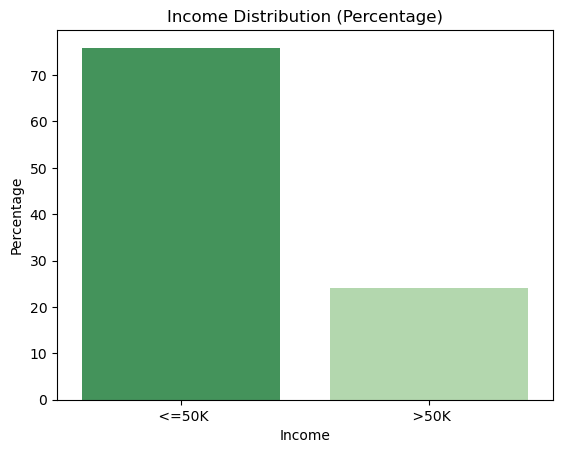

In [37]:
income_counts = df['income'].value_counts(normalize=True) * 100
# Create the countplot with percentages
sns.barplot(x=income_counts.index, y=income_counts.values, hue=income_counts.index, palette='Greens_r', dodge=False)

# Add labels
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.title("Income Distribution (Percentage)")
plt.legend([], [], frameon=False)
plt.show()

Number of people earning above 50k is around 25%

In [13]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

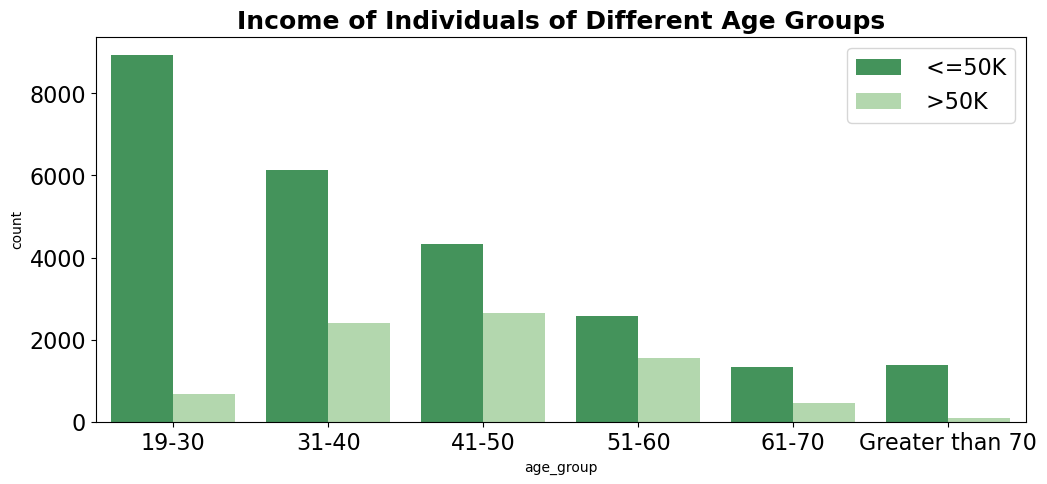

In [14]:
plt.figure(figsize=(12,5))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data=df, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

People earning more than 50k increases as age increases upto a certain extent.

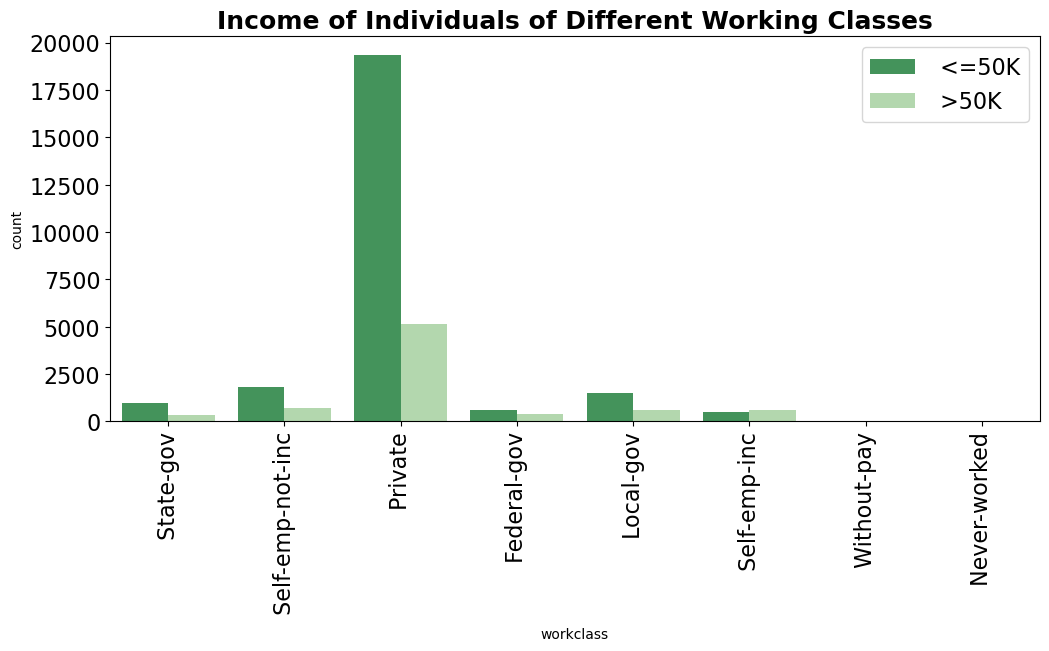

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='workclass', hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

More people are working in private sector and their difference in salary is huge

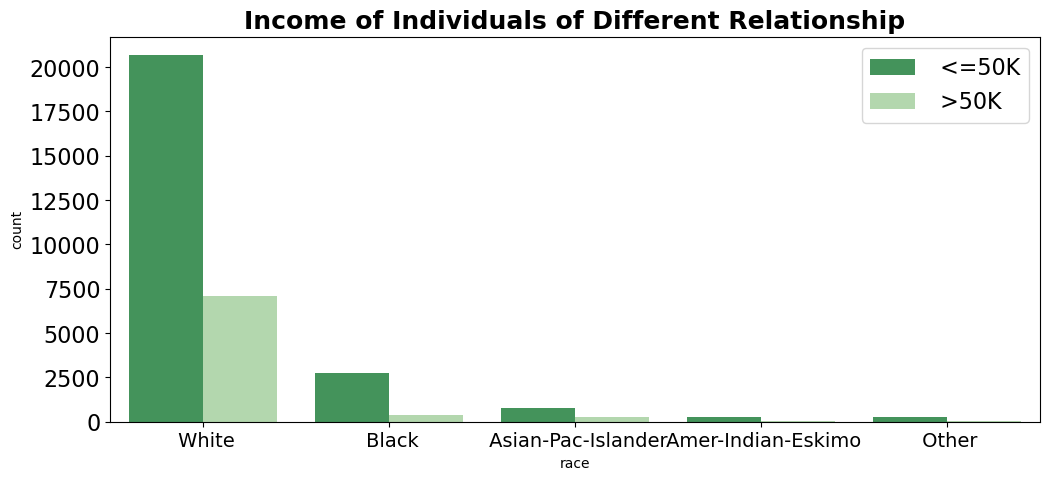

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='race', hue='income', palette='Greens_r') 
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold') 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=16) 
plt.legend(fontsize=16)

Data has more white people working.

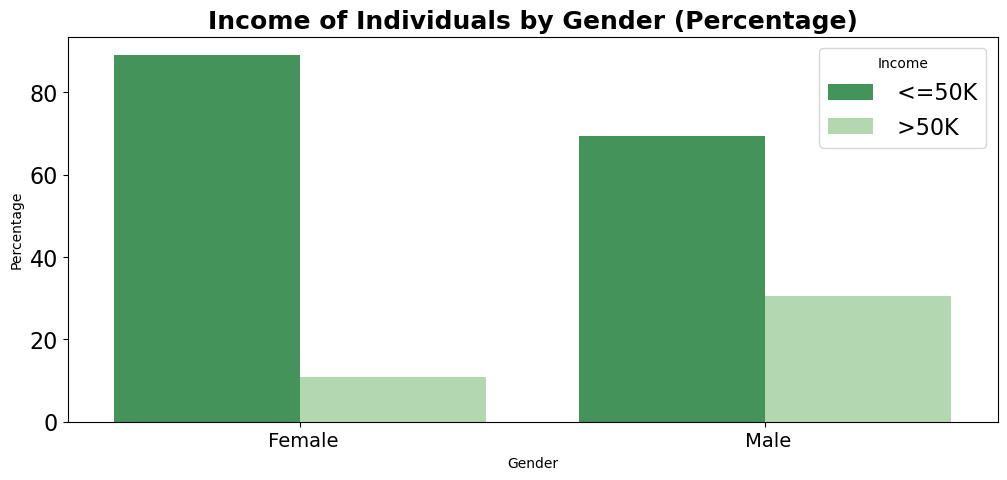

In [17]:
group_counts = df.groupby('gender')['income'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

# Create a barplot with percentages
plt.figure(figsize=(12,5))
sns.barplot(data=group_counts, x='gender', y='percentage', hue='income', palette='Greens_r')

# Formatting the plot
plt.title('Income of Individuals by Gender (Percentage)', fontsize=18, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(title="Income", fontsize=16)

plt.show()

Around 30 % males and 10 % females earn more than 50k a year

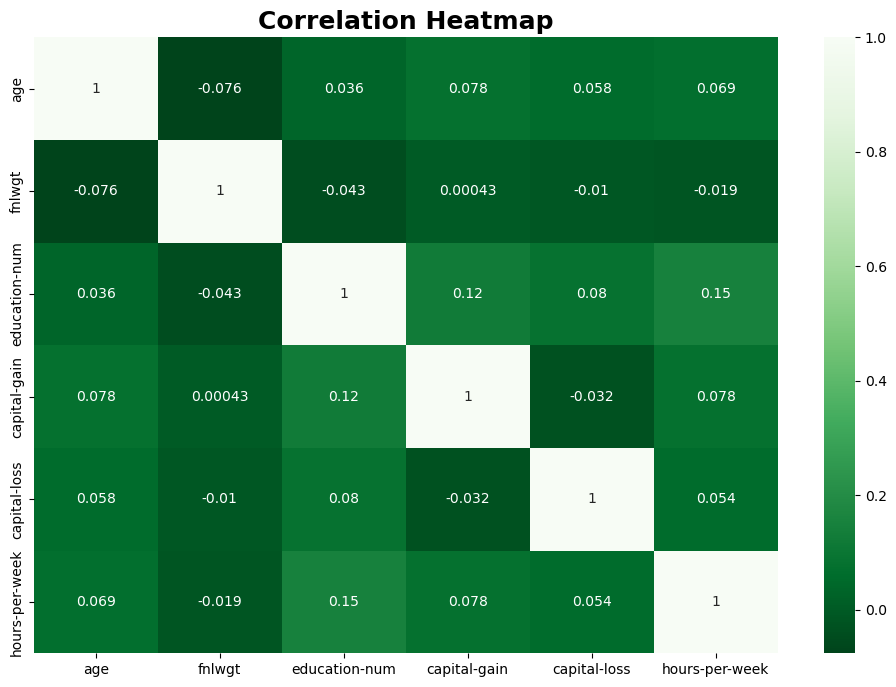

In [18]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='Greens_r', annot=True)
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')
plt.show()

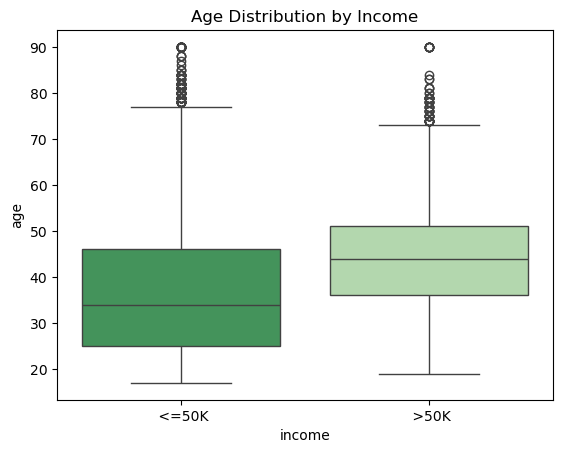

In [19]:
sns.boxplot(x="income", y="age", data=df, hue="income", palette='Greens_r', dodge=False)
plt.title("Age Distribution by Income")
plt.legend([], [], frameon=False)
plt.show()

Most of the data is positively correlated

Split data

In [20]:
X = df.drop(['income'], axis=1)
y = df['income'].apply(lambda x: 1 if x.strip() == ">50K" else 0)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

Encode categorical variables

In [22]:
num_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_features = list(set(X_train.columns) - set(num_features))
all_feature_names = np.concatenate([num_features, cat_features])

In [23]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

Model Training & Testing

In [24]:
# Create new features
df["education_level_per_hour"] = df["education-num"] * df["hours-per-week"]
df["is_capital_gain"] = (df["capital-gain"] > 0).astype(int)

In [25]:
# Create pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [26]:
# Create pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

In [27]:
# Define hyperparameters for tuning
logreg_params = {
    "classifier__C": [0.1, 1, 10]
}

rf_params = {
     "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [10, 15, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}


In [28]:
# Grid search with 5-fold CV for both models
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring="accuracy", n_jobs=-1)

In [29]:
# Fit models
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['age_group',
                                                                          'relationship',
                                                                          'native-country',
                                                                          'gender',
                                                                          'education',
                                                                          'race',
                                                                          'marital-status',
                                                                          'workclass',
                                                                          'fnlwgt',
                                                                          'occupation'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 15, 20, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [30]:
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['age_group',
                                                                          'relationship',
                                                                          'native-country',
                                                                          'gender',
                                                                          'education',
                                                                          'race',
                                                                          'marital-status',
                                                                          'workclass',
                                                                          'fnlwgt',
                                                                          'occupation'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1, param_grid={'classifier__C': [0.1, 1, 10]},
             scoring='accuracy')

In [31]:
# Best models
best_logreg = logreg_grid.best_estimator_
best_rf = rf_grid.best_estimator_

In [32]:
# Evaluate on test set
y_pred_logreg = best_logreg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

In [33]:
# Metrics
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_logreg),
        "ROC AUC": roc_auc_score(y_test, y_pred_logreg),
        "F1 Score": f1_score(y_test, y_pred_logreg),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "ROC AUC": roc_auc_score(y_test, y_pred_rf),
        "F1 Score": f1_score(y_test, y_pred_rf),
    }
}

metrics

{'Logistic Regression': {'Accuracy': 0.8575087072321246,
  'ROC AUC': 0.774526804648985,
  'F1 Score': 0.6750759168418594},
 'Random Forest': {'Accuracy': 0.8565867650071707,
  'ROC AUC': 0.7736292998980968,
  'F1 Score': 0.6733551096593561}}

Accuracy for both models are 85%

 Model Interpretation

<Axes: title={'center': 'Permutation Importance'}, ylabel='feature'>

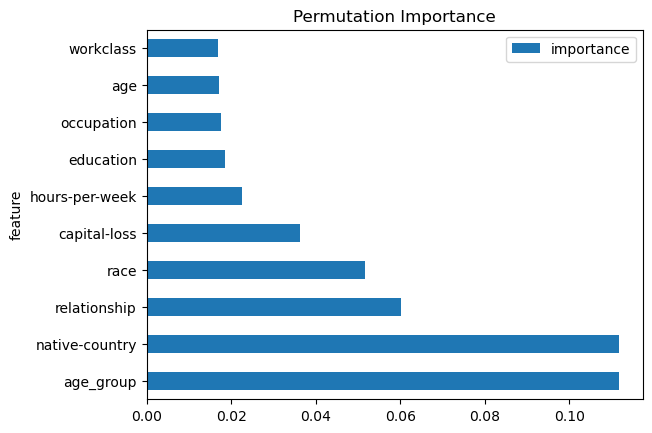

In [34]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_rf, X_test, y_test, n_repeats=10, random_state=42, scoring='f1'
)

importance_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": result.importances_mean
}).sort_values(by="importance", ascending=False)

importance_df.head(10).plot.barh(x="feature", y="importance", title="Permutation Importance")


We can see occupation and race are most influential features

Pipeline Serialization and Loading

In [35]:
import joblib

joblib.dump(best_rf, "random_forest_pipeline.pkl")
print("Pipeline saved as random_forest_pipeline.pkl")

Pipeline saved as random_forest_pipeline.pkl


In [36]:
# Load the pipeline
loaded_pipeline = joblib.load("random_forest_pipeline.pkl")
print("Pipeline loaded successfully.")

# Define the new data
new_data = pd.DataFrame({
    "age": [39],
    "workclass": ["Private"],
    "fnlwgt": [123456],
    "education": ["Bachelors"],
    "education-num": [13],
    "marital-status": ["Married-civ-spouse"],
    "occupation": ["Exec-managerial"],
    "relationship": ["Husband"],
    "race": ["White"],
    "gender": ["Male"],
    "capital-gain": [0],
    "capital-loss": [0],
    "hours-per-week": [40],
    "native-country": ["United-States"]
})

# Define the age_group function
def age_group(x):
    x = int(x)
    x = abs(x)
    if 18 < x < 31:
        return "19-30"
    if 30 < x < 41:
        return "31-40"
    if 40 < x < 51:
        return "41-50"
    if 50 < x < 61:
        return "51-60"
    if 60 < x < 71:
        return "61-70"
    else:
        return "Greater than 70"

# Add the age_group column to the new data
new_data["age_group"] = new_data["age"].apply(age_group)

# Preprocess new data
new_data_processed = loaded_pipeline.named_steps["preprocessor"].transform(new_data)

# Predict income class
prediction = loaded_pipeline.named_steps["classifier"].predict(new_data_processed)
print("Prediction:", ">50K" if prediction[0] == 1 else "<=50K")

Pipeline loaded successfully.
Prediction: <=50K
